#OBJETIVO: PREDECIR EL NIVEL DE CÁNCER QUE PADECE UN PACIENTE A PARTIR DE SUS HÁBITOS, CIRCUNSTANCIAS DEL ENTORNO, CONDICIONES MÉDICAS Y PRESENCIA DE SÍNTOMAS


#CONTEXTO COMERCIAL: En materia de enfermedades oncológicas, la detección temprana del cuadro es determinante a los fines de poder iniciar un tratamiento adecuado y lograr tasas elevadas de supervivencia.
# Por ese mismo motivo, resulta valioso poder identificar cuales son los factores que conducen a padecer un cáncer de mayor intensidad como así también los síntomas que más evidencian el mismo

#PROBLEMA COMERCIAL: Como no siempre se puede contar con la posibilidad de realizarse estudios de alta complejidad con frecuencia, a los fines de determinar la presencia de la enfermedad, es útil poder
#identificar cuales son los factores, ya sean síntomas, condiciones médicas, hábitos o circunstancias del entorno, los cuales puedan actuar como indicadores de alerta que llamen la atención de pacientes y
#profesionales de la salud a los fines de realizar analisis más exhaustivos y lograr la detección temprana del cuadro


In [28]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/81/d7/d2537d51efb692d0c411e64267ba349e7668d40f5bc73cefe78ccd650dcd/scipy-1.11.3-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 809.1 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 f

In [68]:
import pandas as pd
import numpy as np
import os


In [75]:
nueva_ruta = 'C:\\Users\\poncho\\Desktop\\Trabajos Data Science' 
os.chdir(nueva_ruta) 
df = pd.read_csv("cancer_patient_data_sets.csv", sep = ",") 
print(df.head())

   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

In [76]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
mpl.style.use('bmh')

In [77]:
df.columns = ['Index','Paciente ID','Edad','Genero','Contaminación del aire','Uso de alcohol','Alergia al polvo','Amenazas ocupacionales','Riesgo genetico','Enfermedad pulmon crónicas','Dieta balanceada','Obesidad','Fumador','Fumador pasivo','Dolor de pecho','Tos con sangre','Fatiga','Perdida de peso','Falta de aliento','Sibilancias','Dificultad al tragar','Acropaquia','Frecuencia de resfrío','Tos seca','Espectoramiento','Nivel de cancer']

In [78]:
df['Index'] = df['Index'] + 1

df.head()




,Index,Paciente ID,Edad,Genero,Contaminación del aire,Uso de alcohol,Alergia al polvo,Amenazas ocupacionales,Riesgo genetico,Enfermedad pulmon crónicas,...,Fatiga,Perdida de peso,Falta de aliento,Sibilancias,Dificultad al tragar,Acropaquia,Frecuencia de resfrío,Tos seca,Espectoramiento,Nivel de cancer
0,1,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,2,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,3,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,4,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,5,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [79]:
df = df.set_index("Index")
df.head()

,Paciente ID,Edad,Genero,Contaminación del aire,Uso de alcohol,Alergia al polvo,Amenazas ocupacionales,Riesgo genetico,Enfermedad pulmon crónicas,Dieta balanceada,...,Fatiga,Perdida de peso,Falta de aliento,Sibilancias,Dificultad al tragar,Acropaquia,Frecuencia de resfrío,Tos seca,Espectoramiento,Nivel de cancer
Index,,,,,,,,,,,,,,,,,,,,,
1,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
2,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
3,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
4,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
5,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


VARIABLE TARGET: NIVEL DE CÁNCER
En este caso mi variable target se trata de una variable categórica por lo que el modelo a desarrollar sera de aprendizaje supervisado de Clasificacion


In [80]:
df['Genero'] = df['Genero'].replace(1, "Masculino")
df['Genero'] = df['Genero'].replace(2, "Femenino")
df['Nivel de cancer'] = df['Nivel de cancer'].replace("High", "Alto")
df['Nivel de cancer'] = df['Nivel de cancer'].replace("Medium", "Medio")
df['Nivel de cancer'] = df['Nivel de cancer'].replace("Low", "Bajo")

In [81]:
conteo_pacientes_genero = df.groupby(['Genero', 'Nivel de cancer']).size()
print(conteo_pacientes_genero)
#Como se encuentra distribuido segun género y nivel de cáncer que padece el paciente

Genero     Nivel de cancer
Femenino   Alto               113
           Bajo               154
           Medio              135
Masculino  Alto               252
           Bajo               149
           Medio              197
dtype: int64


In [82]:
df.info()
#No presenta datos nulos

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Paciente ID                 1000 non-null   object
 1   Edad                        1000 non-null   int64 
 2   Genero                      1000 non-null   object
 3   Contaminación del aire      1000 non-null   int64 
 4   Uso de alcohol              1000 non-null   int64 
 5   Alergia al polvo            1000 non-null   int64 
 6   Amenazas ocupacionales      1000 non-null   int64 
 7   Riesgo genetico             1000 non-null   int64 
 8   Enfermedad pulmon crónicas  1000 non-null   int64 
 9   Dieta balanceada            1000 non-null   int64 
 10  Obesidad                    1000 non-null   int64 
 11  Fumador                     1000 non-null   int64 
 12  Fumador pasivo              1000 non-null   int64 
 13  Dolor de pecho              1000 non-null   int64 
 1

Text(0, 0.5, 'Cantidad de pacientes')

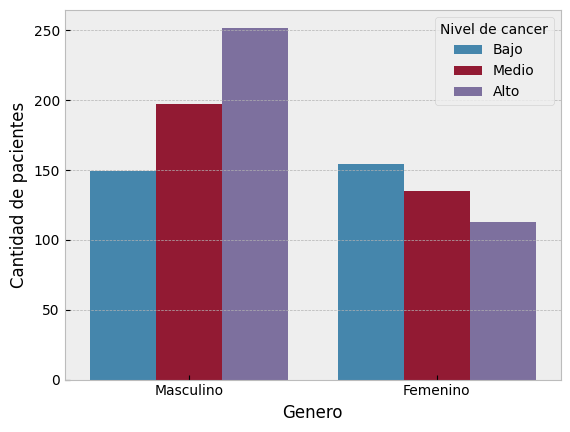

In [83]:
sns.countplot(data=df, x='Genero', hue='Nivel de cancer')
plt.ylabel('Cantidad de pacientes')
#Se puede observar que si bien es cierto que hay mayor cantidad de pacientes masculinos que femeninos, presentan cantidades similares respecto al numero de pacientes con cancer nivel bajo,
#en el nivel medio hay una diferencia aproximada de casi 50 pacientes a favor de los masculinos, extendiendose esta diferencia aún más en el caso de los pacientes de cáncer alto

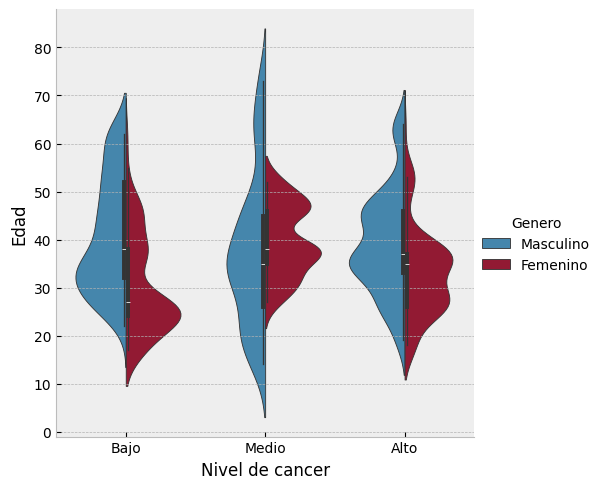

In [84]:
ax=sns.catplot (data=df, kind='violin', x= 'Nivel de cancer', y='Edad', hue= 'Genero', split = True)
#La mayor cantidad de pacientes se concentra entre los rangos de 20 y 50 años de edad

<Axes: xlabel='Nivel de cancer', ylabel='Uso de alcohol'>

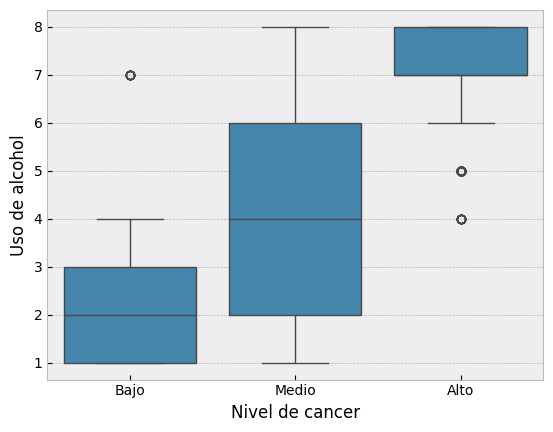

In [93]:
plt.figure()
sns.boxplot(data=df, x="Nivel de cancer", y="Uso de alcohol" )


Podemos observar como más del 75% de pacientes con cancer alto registran niveles altos de consumo de alcohol, diametralmente opuesto a los casos de pacientes con cancer nivel bajo, los cuales en su gran mayorìa no registran niveles superiores a 3

<Axes: xlabel='Nivel de cancer', ylabel='Fumador'>

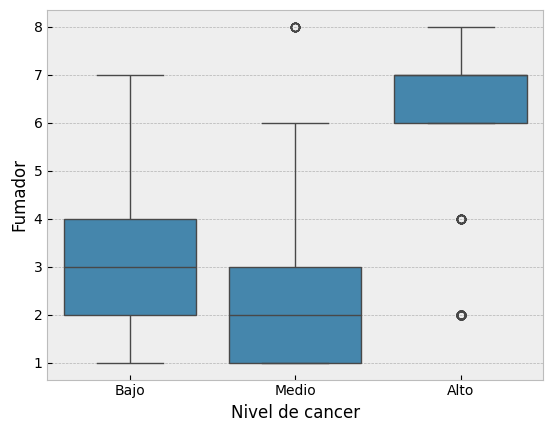

In [86]:
plt.figure()
sns.boxplot(data=df, x="Nivel de cancer", y="Fumador")

Si bien es cierto que se evidencia que los pacientes con cancer alto registran un nivel de intensidad del habito de fumar superior a 6. Un 25% de los pacientes de nivel bajo tambièn registran niveles de entre 4 y 7, como asi también, el 75% de pacientes con cancer medio registra niveles relativamente bajos en el hábito de fumar por lo que la correlacion no está tan clara

<Axes: xlabel='Nivel de cancer', ylabel='Obesidad'>

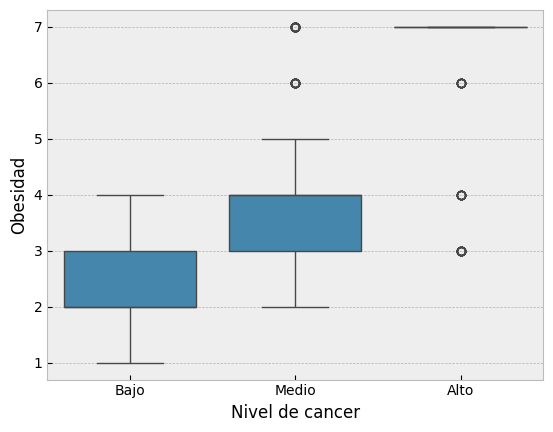

In [87]:
plt.figure()
sns.boxplot(data=df, x="Nivel de cancer", y="Obesidad")

Conclusión: con respecto al presente grafico, se puede observar claramente que en los pacientes con cáncer de nivel alto se registran niveles de obesidad superiores que en aquellos que pertenecen a las dos categorías restantes.

<Axes: xlabel='Nivel de cancer', ylabel='Dieta balanceada'>

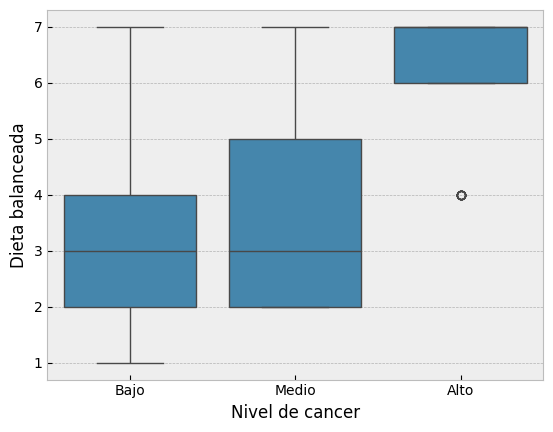

In [88]:
plt.figure()
sns.boxplot(data=df, x="Nivel de cancer", y="Dieta balanceada")

Conclusion= Se puede observar cierta correlacion entre una dieta desbalanceada(niveles de 7) y un cancer alto, pero más del 50% de pacientes de cancer bajo y medio registran niveles de 3 o incluso menos.

In [89]:
promedio_obesidad_nivel_alto = df[df['Nivel de cancer'] == 'Alto']['Obesidad'].mean()
promedio_fumador_nivel_alto = df[df['Nivel de cancer'] == 'Alto']['Fumador'].mean()
promedio_dieta_nivel_alto = df[df['Nivel de cancer'] == 'Alto']['Dieta balanceada'].mean()
promedio_alcohol_nivel_alto = df[df['Nivel de cancer'] == 'Alto']['Uso de alcohol'].mean()
print(promedio_obesidad_nivel_alto,promedio_alcohol_nivel_alto,promedio_dieta_nivel_alto,promedio_fumador_nivel_alto)

6.682191780821918 6.83013698630137 6.619178082191781 6.073972602739726


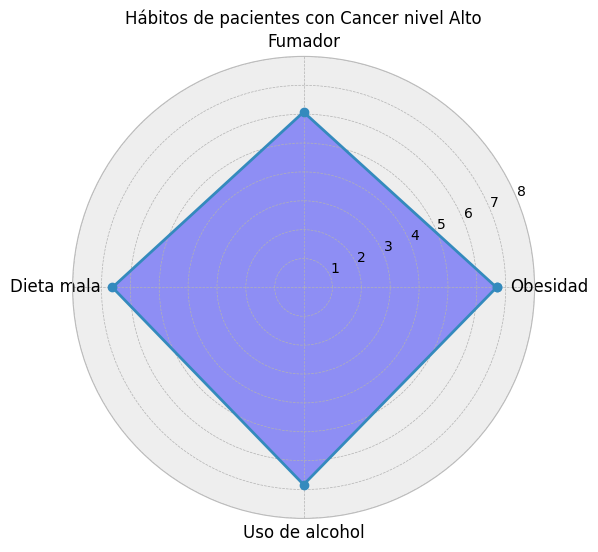

In [90]:
categorias_habitos_alto= ['Obesidad', 'Fumador','Dieta mala ','Uso de alcohol']
promedios_habitos_alto = [promedio_obesidad_nivel_alto, promedio_fumador_nivel_alto, promedio_dieta_nivel_alto, promedio_alcohol_nivel_alto]


numero_categorias_habitos_alto = len(categorias_habitos_alto)
angulos_habitos_alto = np.linspace(0, 2 * np.pi, numero_categorias_habitos_alto, endpoint=False).tolist()
angulos_habitos_alto += angulos_habitos_alto[:1]


promedios_habitos_alto += promedios_habitos_alto[:1]

radar = plt.figure(figsize=(6, 6))
plt.polar(angulos_habitos_alto,promedios_habitos_alto,'o-',linewidth=2)


plt.xticks(angulos_habitos_alto[:-1], categorias_habitos_alto, fontsize=12)
plt.fill(angulos_habitos_alto, promedios_habitos_alto, 'b', alpha=0.4)



plt.title('Hábitos de pacientes con Cancer nivel Alto', fontsize=12)
plt.ylim(0, 8)


plt.show()

Aqui podemos observar en el grafico la tendencia que existe en los pacientes de cancer de nivel alto a llevar malos hábitos de vida. Se puede observar en el promedio obtenido respecto de la categoria un alto nivel de intensidad con respecto a estas variables. Corresponde repetir el proceso a los fines de contrastar con los pacientes de nivel medio y nivel bajo. Como así también trasladarlo a las demás variables para examinar si existe correspondencia o no